# Combining and Interacting with Graphics 

In this notebook, we will explore layering and combining plots.

There are four methods of combining graphics.

* **Layer** one plot on top of another with `+`
* Combine separate panels **Horizontally** with `|`
* Combine separate panels **Vertically** with `&`
* Create **Facets** using the `row` and `col` encodings.

In [1]:
import altair as alt
from vega_datasets import data

In [2]:
# Uncomment/run this line to enable Altair in the classic notebook (not JupyterLab)
# alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Layered Line Plot

We can use the `+` operator to *layer* one plot on top of the other.

<img src="../images/3_1_layered.png">

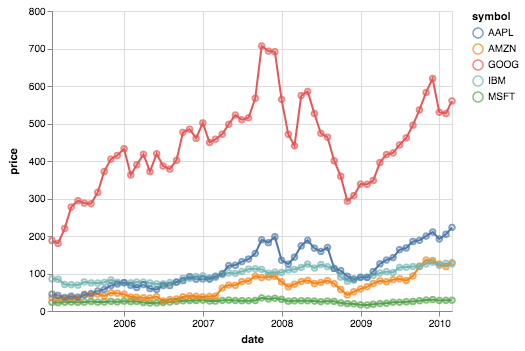

In [3]:
stocks = data.stocks()

base = alt.Chart(stocks).encode(
    x='date:T',
    y='price',
    color='symbol',
).transform_filter("year(datum.date) >= 2005")

base.mark_line() + base.mark_point()

<font color="red"> <h2> Task 1 - Scatterplot</h2> </font> 

The next cell contains a binned heat map and scatter plot.

* Layer with `heat + scatter`
* Layer with `scatter + heat`

<font color="red"> Question: </font> Does the order of layering matter? Why?

In [4]:
source = data.movies.url

heat = alt.Chart(source).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=alt.Bin(maxbins=12)),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=alt.Bin(maxbins=8)),
    alt.Color('count(IMDB_Rating):Q', scale=alt.Scale(scheme='greenblue'))
)

scatter = alt.Chart(source).mark_circle(color = "black").encode(
    alt.X('IMDB_Rating:Q'),
    alt.Y('Rotten_Tomatoes_Rating:Q'),
    opacity=alt.value(0.3)
)

# heat + scatter
# scatter + heat

## Combining Panels Horizontally

<img src="../images/3_2_pipe.png">

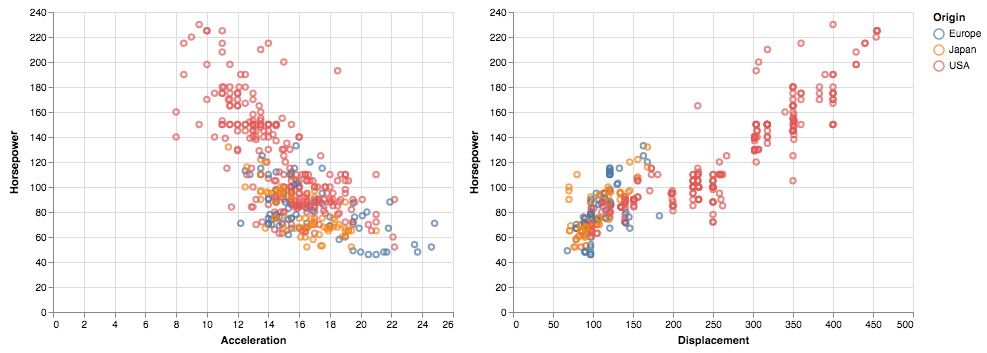

In [6]:
cars = data.cars()
chart = alt.Chart(cars).mark_point().encode(
    y='Horsepower:Q',
    color='Origin:N'
).interactive()

chart.encode(x='Acceleration:Q') | chart.encode(x='Displacement:Q')

## Saving Common Code

<img src="../images/3_5_common.png">

<img src="../images/3_5_different.png">

## Combining Panels Vertically

Use `&` to combine vertically.

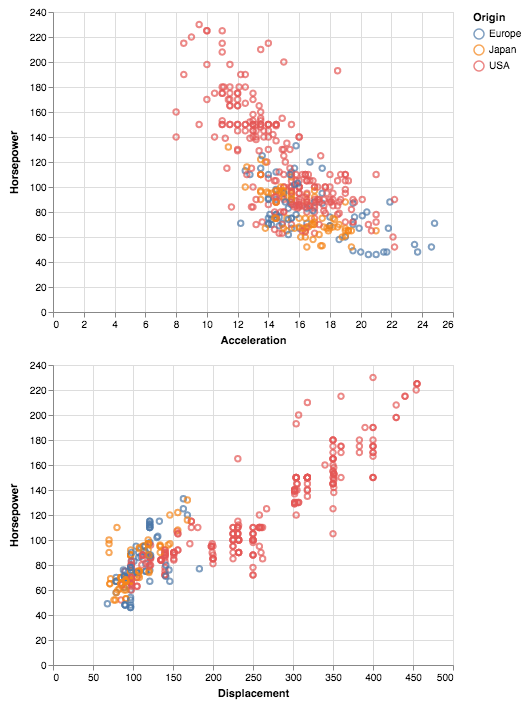

In [7]:
chart.encode(x='Acceleration:Q') & chart.encode(x='Displacement:Q')

<font color="red"> <h2> Task 2 - Scatterplot</h2> </font> 

Make a 3x3 scatter plot matrix for 

* *Acceleration*
* *Displacement*
* *Horsepower*


## Repeated Scatter

<img src="../images/3_3_repeat.png">

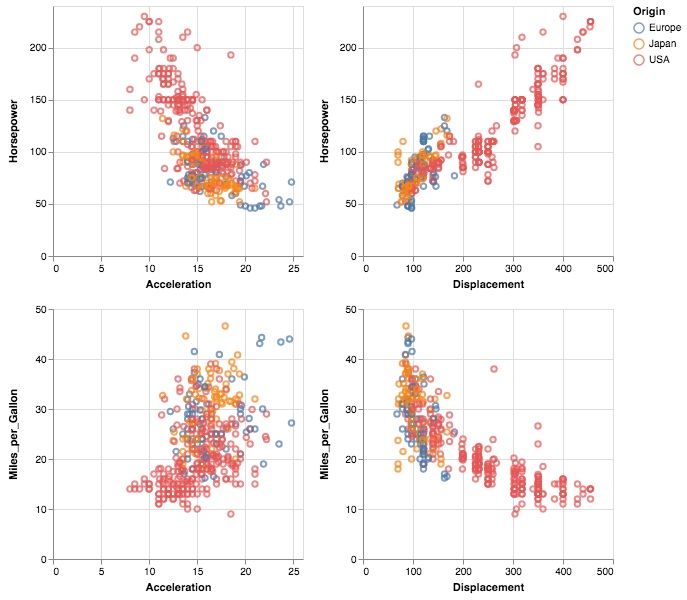

In [8]:
alt.Chart(cars).mark_point().encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Origin:N'
).properties(
    width=250,
    height=250
).repeat(
    row=['Horsepower', 'Miles_per_Gallon'],
    column=['Acceleration', 'Displacement']
)

<font color="red"> <h2> Task 3 - Scatterplot</h2> </font> 

Now use `repeat` to make a 3x3 scatter plot matrix for 

* *Acceleration*
* *Displacement*
* *Horsepower*


## Creating Facets

<img src="../images/3_4_facets.png">

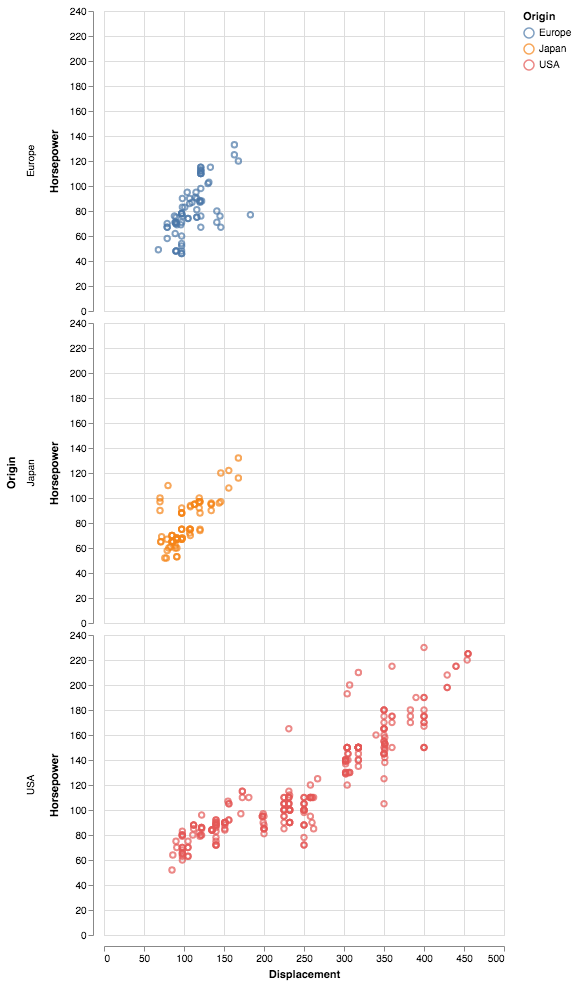

In [9]:
chart = alt.Chart(cars).mark_point().encode(
    x='Displacement:Q',
    y='Horsepower:Q',
    color='Origin:N',
    row='Origin:N',
)

chart

<font color="red"> <h2> Task 4 - Faceting Stock Prices</h2> </font>

Make a line chart of the stock prices, faceting
by the *symbol* (See the example at the top of the page)

In [75]:
stocks = data.stocks()



# Interactivity

Altair and Vega-Lite also allow user-interaction, which we will explore next.

## Interactive Scatter chart

Adding `interactive` allows the plot to zoom and pan.

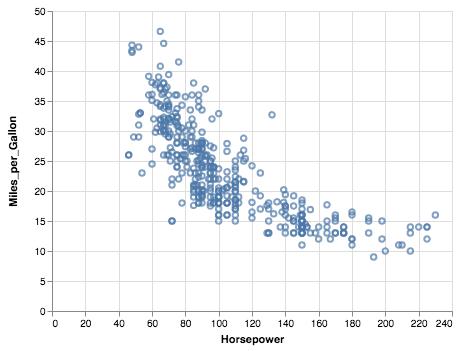

In [10]:
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
).interactive()

## Interactive Repeated Scatter

Note that panning and scrolling changes all plots simultaneously.

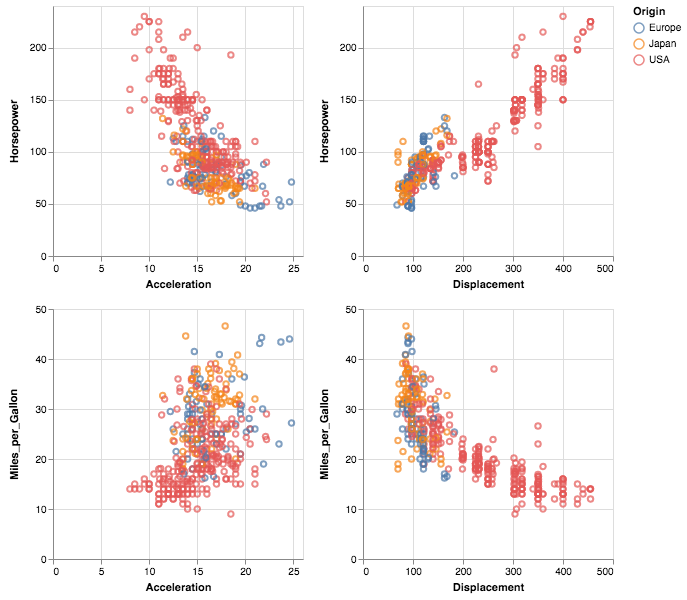

In [11]:
alt.Chart(cars).mark_point().encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Origin:N'
).properties(
    width=250,
    height=250
).repeat(
    row=['Horsepower', 'Miles_per_Gallon'],
    column=['Acceleration', 'Displacement']
).interactive()

## Multi-Panel Scatter with Linked Brushing

Use `selection = brush` to allow selection of elements.

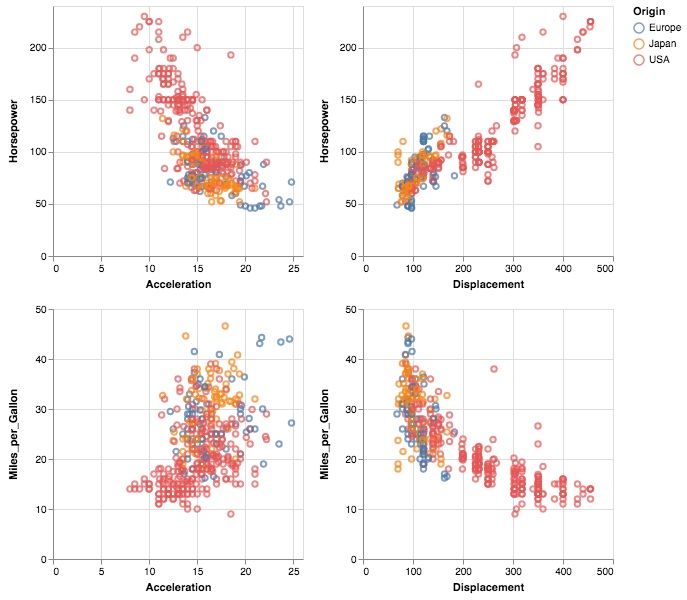

In [12]:
brush = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color=alt.condition(brush, 'Origin:N', alt.value('gray'))
).properties(
    width=250,
    height=250,
    selection=brush
).repeat(
    row=['Horsepower', 'Miles_per_Gallon'],
    column=['Acceleration', 'Displacement']
)

## Other Examples

Check out the [Altair Example Gallery](https://altair-viz.github.io/gallery/) for many more examples.